In [ ]:
'''
How do we know how many Clusrters?

In [ ]:
'''
1. Elbow Method
    - The Elbow Method is one of the most popular methods to determine this optimal value of k.
    
How Elbow Method Works
    - Finding the diameter of the clusering, it is somethng largest possible distance between two points of same group.
      Basically it tells how big each group is.

In [ ]:
'''
Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. 
            Typically, the Euclidean distance metric is used.
            
Inertia: It is the sum of squared distances of samples to their closest cluster center.


In [1]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

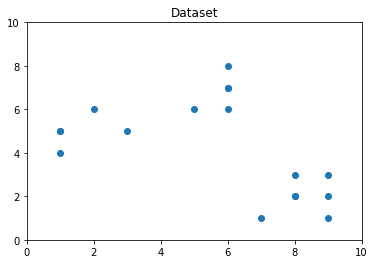

In [2]:
# Creating the data
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
 
# Visualizing the data
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

In [ ]:
'''

1. Calculate Cluster Center Center for K value
2. find the 'distortions' # Average distance between 'Cluster Center' for the data points
3. find the 'inertias'


In [95]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10) # Cluster

In [108]:
# Building and fitting the model
kmeanModel = KMeans(n_clusters=1).fit(X)

kmeanModel.fit(X)

cdist(X, kmeanModel.cluster_centers_,'euclidean')

array([[2.68276571],
       [4.59765248],
       [4.64221639],
       [3.97309289],
       [4.64221639],
       [3.728688  ],
       [1.75487458],
       [2.73703297],
       [1.80445431],
       [2.73703297],
       [3.58389323],
       [3.32860102],
       [4.74250456],
       [3.32860102],
       [3.64895586],
       [4.11133971],
       [2.73703297]])

In [96]:
for k in K:
    
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [112]:
distortions

[3.4577032384495707,
 1.7687413573405673,
 0.8819889697423957,
 0.7587138847606585,
 0.6627384240083372,
 0.5920126825722446,
 0.4897638645704274,
 0.4442520441076937,
 0.3576988370023389]

In [98]:
inertias

[217.64705882352948,
 68.42857142857142,
 16.228571428571428,
 12.695238095238095,
 10.016666666666667,
 7.5166666666666675,
 5.916666666666667,
 4.166666666666667,
 3.333333333333333]

In [99]:
mapping1

{1: 3.4577032384495707,
 2: 1.7687413573405673,
 3: 0.8819889697423957,
 4: 0.7587138847606585,
 5: 0.6627384240083372,
 6: 0.5920126825722446,
 7: 0.4897638645704274,
 8: 0.4442520441076937,
 9: 0.3576988370023389}

In [100]:
mapping2

{1: 217.64705882352948,
 2: 68.42857142857142,
 3: 16.228571428571428,
 4: 12.695238095238095,
 5: 10.016666666666667,
 6: 7.5166666666666675,
 7: 5.916666666666667,
 8: 4.166666666666667,
 9: 3.333333333333333}

In [101]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 3.4577032384495707
2 : 1.7687413573405673
3 : 0.8819889697423957
4 : 0.7587138847606585
5 : 0.6627384240083372
6 : 0.5920126825722446
7 : 0.4897638645704274
8 : 0.4442520441076937
9 : 0.3576988370023389


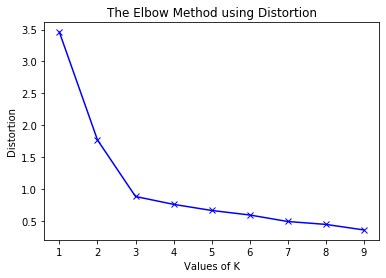

In [102]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [104]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 217.64705882352948
2 : 68.42857142857142
3 : 16.228571428571428
4 : 12.695238095238095
5 : 10.016666666666667
6 : 7.5166666666666675
7 : 5.916666666666667
8 : 4.166666666666667
9 : 3.333333333333333


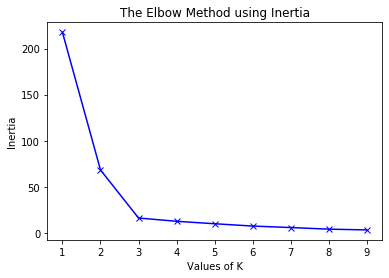

In [105]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()